In [167]:
"""
    Authors: 
        Ali Karimiafshar <karimiafsharali@gmail.com>
        Vitor Freitas <vit1905@live.missouristate.edu>
        Kadidia Kantao
    Date:
        12/09/2021
    Dataset:
        https://www.kaggle.com/c/digit-recognizer/data
""";

In [168]:
from DigitRecognizerNeuralNetwork import DigitRecognizerNeuralNetwork

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [169]:
# Read the data and display the first seven elements.
data = pd.read_csv("train.csv")
data.head(7)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
# Convert data to numpy array
data = np.array(data)

# Divide the data in two groups for training (80%) and testing (20%).
dataSampleSize, features = data.shape
splitPoint = int(dataSampleSize*0.80)

# Transpose the data so that each column corresponds with a new sample and each rwo with the pixel values.
# Normalize the pixel values to a range [0, 1].

# Training data.
data_train = data[:splitPoint].T
X_train = data_train[1:] / 255
Y_train = data_train[0]

# Cross validation data.
data_cross = data[splitPoint:].T
X_cross = data_cross[1:] / 255
Y_cross = data_cross[0]

In [171]:
# If the network has not been trained before and no "learned_wnb.pkl" file exists set to True
isTrainingNeeded = False

learned_weights_and_biases = None
if isTrainingNeeded:
    # Create and train the Neural Network
    digit_neural_network = DigitRecognizerNeuralNetwork(X_train, Y_train, dataSampleSize, 1000, 0.10)
    
    # Extract learned weights and biases from the neural network for displaying and testing.
    learned_weights_and_biases = digit_neural_network.tunes
else:
    # Load learned weights and biases from the pickled file for displaying and testing.
    with open("learned_wnb.pkl", "rb") as inFile:
        learned_weights_and_biases = pickle.load(inFile)

In [172]:
# To view the weights and biases, remove the semicolon. 
learned_weights_and_biases;

In [173]:
# Create a testing neural network and classify cross validation data.
testing_digit_network = DigitRecognizerNeuralNetwork(X_cross, Y_cross, dataSampleSize, 0, 0, False, learned_weights_and_biases)
predictions = testing_digit_network.predictions

Network predictions:	[0 7 7 2 2 6 0 7 3 5 2 0 2 7 6 9 2]
Actual labels:		[0 7 7 2 2 6 5 7 8 5 3 0 2 7 6 9 2]
Accuracy:	87.44%


In [189]:
# Get information about the mislabeled data.
errorList = np.not_equal(Y_cross, predictions)
errorCount = np.count_nonzero(errorList)
errorIndices = np.argwhere(errorList).T.flatten()

In [223]:
def display_sample(pixel_data:np.array, index:int, predictions:np.array, ax:plt.subplot) -> None:
    """ displays a digit on grayscale, and prints the predicted and actual label of the digit.

    Args:
        pixel_data (np.array): X data that contains the pixel values.
        index (int): Index of the digit to be displayed.
        predictions (np.array): array of network outputs.
    """
    
    pixels = pixel_data[:,index].reshape(28, 28)
    label = Y_cross[index]
    prediction = predictions[index]
    # print(f"Actual label:\t{label}\npred label:\t{prediction}\n")
    plt.imshow(pixels, plt.cm.gray_r)
    ax.set_title(f"Actual label: {label}")
    ax.set_xlabel(f"Predicted label: {prediction}")

C:\Users\Ali\AppData\Local\Temp/ipykernel_17040/3168745031.py:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(numRows, numCols, i + 1)


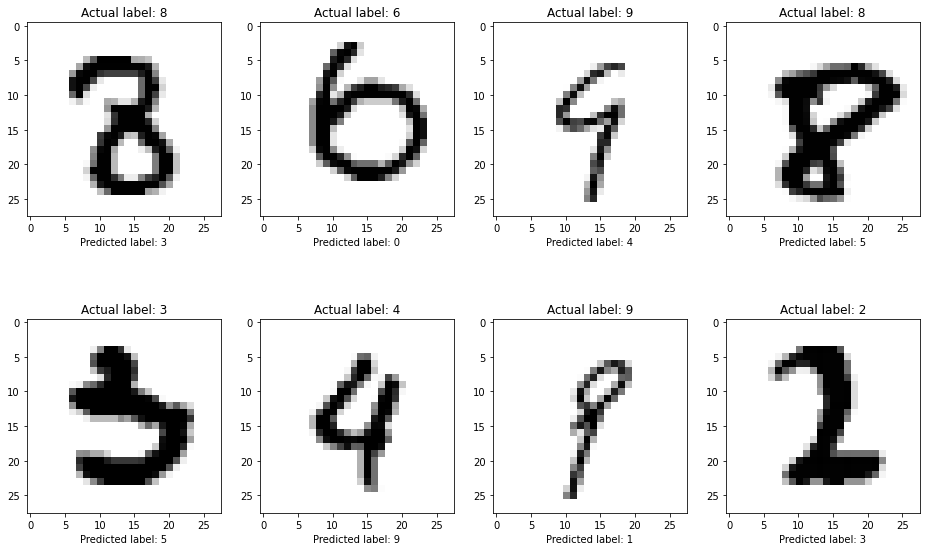

In [253]:
# Select how many random mislabeled data to be displayed.
# Must be divisible by 4.
num_mislabeled_display = 8

if num_mislabeled_display % 4 != 0:
    raise(BaseException("num_mislabeled_display is NOT divisible by 4."))

numRows, numCols = num_mislabeled_display / 4, 4

# shuffle the mismatch indices to select a number at random.
np.random.shuffle(errorIndices)
random_mislabeled_data = errorIndices[:num_mislabeled_display]

# Create a figure for the subplots.
fig = plt.figure(figsize=(16, num_mislabeled_display*1.25))

# plot the axes on the figure.
for i, ix in enumerate(random_mislabeled_data):
    ax = fig.add_subplot(numRows, numCols, i + 1)
    display_sample(X_cross, ix, predictions, ax)